# Principal Component Analysis in scikit-learn

## Introduction

Now that you've seen the curse of dimensionality, it's time to take a look at a dimensionality reduction technique! This will help you overcome the challenges of the curse of dimensionality (amongst other things). Essentially, PCA, or Principal Component Analysis, attempts to capture as much information of the dataset as possible while reducing the overall number of features.

## Objectives

You will be able to:

* Explain use cases for PCA
* Explain at a high level what PCA does
* Implement PCA algorithm using scikit-learn library 

## Generating Some Data

First, you need some data to perform PCA on. With that, here's a quick dataset you can generate using NumPy:

In [1]:
import numpy as np

x1 = np.linspace(-10,10,100)
x2 = np.array([xi*2 + np.random.normal(loc=0, scale=.5) for xi in x1]) #A linear relationship, plus a little noise

X = np.matrix(list(zip(x1,x2)))

In [2]:
x2 = np.array(x2)

Let's also generate a quick plot of this simple dataset to further orientate ourselves:

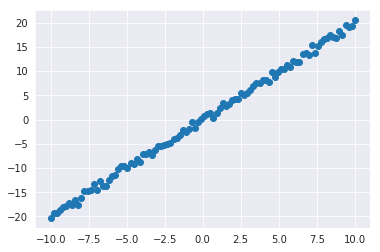

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

plt.scatter(x1,x2);

## Performing PCA with sci-kit learn

Now onto PCA. First, take a look at how simple it is to implement PCA with sci-kit learn:

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(X)

And you can once again plot the updated dataset:

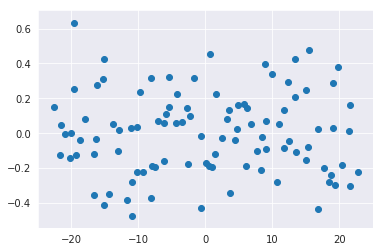

In [5]:
plt.scatter(transformed[:,0], transformed[:,1]);

In [6]:
pca.components_

array([[-0.44686606, -0.89460087],
       [-0.89460087,  0.44686606]])

In [7]:
pca.mean_

array([ 7.10542736e-17, -1.79079789e-02])

## Interpreting Results

Let's take a look at what went on here. PCA transforms the dataset along principle axes. The first of these axes is designed to capture the maximum variance within the data. From here, additional axes are constructed which are orthogonal to the previous axes and continue to account for as much of the remaining variance as possible.

For the current 2-d case, the axes which the data was projected onto look like this:

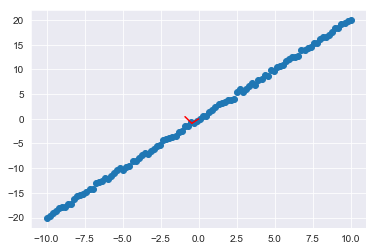

In [8]:
plt.scatter(x1,x2);
ax1, ay1 = pca.mean_[0], pca.mean_[1]
ax2, ay2 = pca.mean_[0]+pca.components_[0][0], pca.mean_[1]+pca.components_[0][1]
ax3, ay3 = pca.mean_[0]+pca.components_[1][0], pca.mean_[1]+pca.components_[1][1]
plt.plot([ax1,ax2], [ay1,ay2], color='red')
plt.plot([ax2,ax3], [ay2,ay3], color='red');

So the updated graph you saw, is the same dataset rotated onto these red axes:

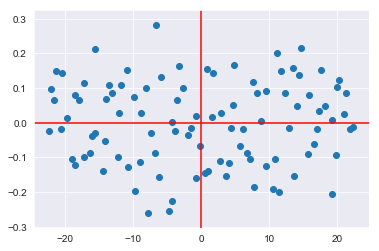

In [9]:
plt.scatter(transformed[:,0], transformed[:,1]);
plt.axhline(color='red')
plt.axvline(color='red')

Note the small scale of the y-axis. You can also plot the transformed dataset on the new axes with a scale similar to what you saw before:

(-10, 10)

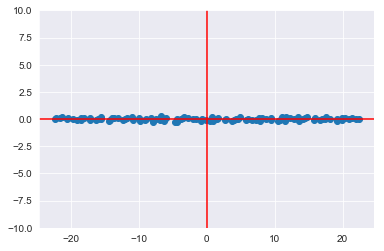

In [10]:
plt.scatter(transformed[:,0], transformed[:,1]);
plt.axhline(color='red')
plt.axvline(color='red')
plt.ylim(-10,10)

Again, this is the geographical interpretation of what just happened:  

<img src="images/inhouse_pca.png">

## Determining the Explained Variance

Typically, one would use PCA to actually reduce the number of dimensions. In this case, you've simply reparameritized the dataset along new axes. That said, if you look at the first of these primary axes, you can see the patterns encapsulated by the principle component. Moreover, sci-kit learn also lets you quickly determine the overall variance in the dataset accounted for in each of the principle components.

In [11]:
pca.explained_variance_ratio_

array([9.99917201e-01, 8.27993112e-05])

Keep in mind that these quantities are cumulative: principle component 2 attempts to account for the variance not accounted for in the primary component. You can view the total variance using `np.cumsum()`:

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.9999172, 1.       ])

## Visualizing the Principle Component Alone

To help demonstrate the structure captured by the first principal component, observe the impact of coloring the dataset and then visualizing the first component.

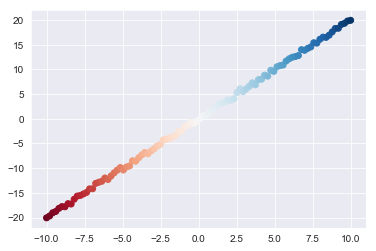

In [28]:
plt.scatter(x1,x2, c=sns.color_palette('RdBu', n_colors=100));

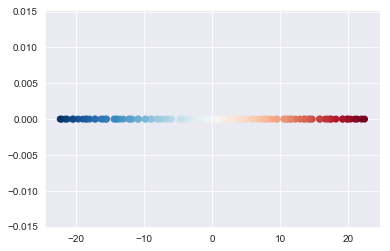

In [30]:
plt.scatter(transformed[:,0], [0 for i in range(100)] , c=sns.color_palette('RdBu', n_colors=100))

## Steps for Performing PCA

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here's the exact steps:

1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
    1. You'll further investigate the concept of eigenvectors in the upcoming lesson
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean centered features

You can see some of these intermediate steps from the `pca` instance object itself. 

In [23]:
pca.mean_ #Pulling up the original feature means which were used to center the data

array([ 7.10542736e-17, -1.79079789e-02])

In [24]:
pca.get_covariance() #Pulling up the covariance matrix of the mean centered data

array([[ 34.35023637,  68.7387464 ],
       [ 68.7387464 , 137.6253672 ]])

In [25]:
pca.components_ #Pulling up the eigenvectors of the covariance matrix

array([[-0.44686606, -0.89460087],
       [-0.89460087,  0.44686606]])

##  Summary
In this lesson, you looked at implementing PCA with scikit-learn and the geometric interpretations of principle components. From here, you'll get a chance to practice implementing PCA yourself before going on to code some of the underlying components implemented by sci-kit learn using NumPy.